In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

WINDOW_LENGTH = 15
WINDOW_WIDTH = 15

[[[136 127  82]
  [137 126  80]
  [135 130  83]
  ...
  [161 157 124]
  [162 153 132]
  [160 154 133]]

 [[138 127  77]
  [139 126  77]
  [140 126  80]
  ...
  [165 157 133]
  [160 153 137]
  [156 150 135]]

 [[137 125  70]
  [141 125  73]
  [144 126  76]
  ...
  [162 154 133]
  [159 152 132]
  [159 152 129]]

 ...

 [[176 167  50]
  [178 163  53]
  [172 164  51]
  ...
  [173 156  96]
  [179 152 112]
  [174 154 107]]

 [[180 159  47]
  [180 161  42]
  [182 161  46]
  ...
  [175 159 103]
  [170 150 101]
  [175 155 104]]

 [[190 168  39]
  [190 170  35]
  [185 168  38]
  ...
  [179 157 104]
  [173 158  99]
  [171 156  98]]]
Image Size : 494919
Image Shape : (381, 433, 3)


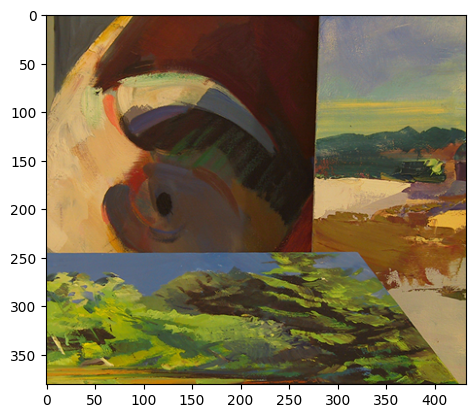

[[[ 75  70  38]
  [ 65  59  45]
  [ 61  56  42]
  ...
  [168 153 135]
  [171 157 138]
  [172 162 140]]

 [[ 73  70  36]
  [ 65  60  51]
  [ 62  59  44]
  ...
  [169 158 136]
  [165 158 136]
  [168 162 140]]

 [[ 73  71  33]
  [ 65  59  50]
  [ 60  57  45]
  ...
  [167 160 138]
  [167 162 137]
  [167 159 135]]

 ...

 [[178 176  51]
  [151 145  37]
  [158 145  49]
  ...
  [176 150 111]
  [185 150 113]
  [188 152 116]]

 [[175 163  41]
  [128 131  25]
  [127 140  51]
  ...
  [177 152 111]
  [183 150 117]
  [187 157 115]]

 [[198 183  66]
  [149 148  32]
  [131 136  37]
  ...
  [177 153 101]
  [181 152 106]
  [185 155 115]]]
Image Size : 494919
Image Shape : (381, 433, 3)


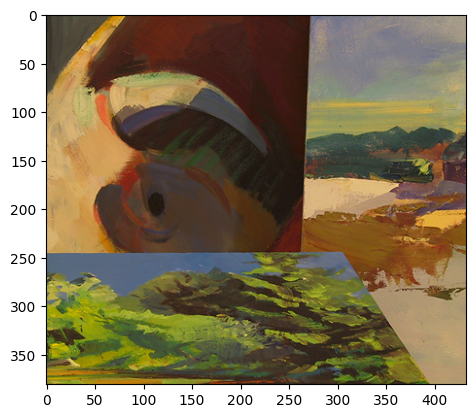

In [86]:
def image_details(url):
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img)
    print(f"Image Size : {img.size}")
    print(f"Image Shape : {img.shape}")
    plt.imshow(img)
    plt.show()
    return img

left_image = image_details("left.png")
right_image = image_details("right.png")

In [87]:
def template_matching(left_image, right_image, window_length, window_width, max_disparity=64):   
    height, width = left_image.shape[0],left_image.shape[1]

    disparity = np.zeros((height - 2 * (window_width // 2), width - 2 * (window_length // 2)))

    half_window_length = window_length // 2
    half_window_width = window_width // 2

    for i in range(half_window_width, height - half_window_width):
        for j in range(half_window_length, width - half_window_length):
            left_patch = left_image[i - half_window_width:i + half_window_width + 1, j - half_window_length:j + half_window_length + 1]

            min_error = np.inf
            best_match = j

            for d in range(min(max_disparity, j - half_window_length)):  
                col = j - d
                
                if col - half_window_length < 0 or col + half_window_length + 1 > width:
                    continue  

                right_patch = right_image[i - half_window_width:i + half_window_width + 1, col - half_window_length:col + half_window_length + 1]
                
                error = np.sum((left_patch - right_patch) ** 2)
                
                if error < min_error:
                    min_error = error
                    best_match = col

            disparity[i - half_window_width, j - half_window_length] = abs(j - best_match)

    return disparity


In [88]:
ans = template_matching(left_image,right_image,WINDOW_LENGTH,WINDOW_WIDTH)


In [89]:
"""original_map  = plt.cm.get_cmap('jet')
map = original_map.reversed()

plt.imshow(ans, cmap=map)
plt.show()"""

"original_map  = plt.cm.get_cmap('jet')\nmap = original_map.reversed()\n\nplt.imshow(ans, cmap=map)\nplt.show()"

C:\Users\Priyanshu Kumar\AppData\Local\Temp\ipykernel_54968\3299491598.py:1: RuntimeWarning: divide by zero encountered in divide
  depth = 1/ans


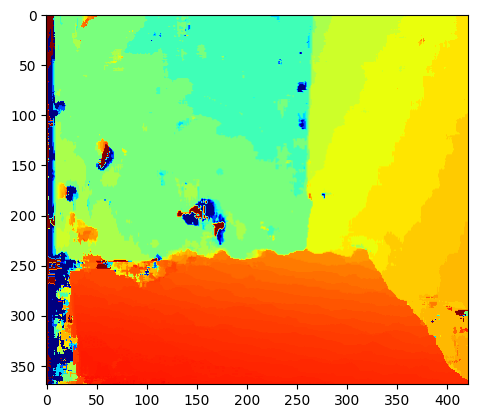

In [90]:
depth = 1/ans
depth[ans == 0] = 0 
k = np.max(depth)
factor = 4
depth[depth > k/factor] = k/factor
plt.imshow(depth, cmap=map)
plt.show()

In [91]:
ans.shape

(369, 421)